## Importing Data  

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving dataset.en.id.csv to dataset.en.id.csv


In [ ]:
data = pd.read_csv('dataset.en.id.csv', delimiter=',')
print("Banyak Data:", len(data))
print(data.info())
print(data.keys())
print(data.head())

Banyak Data: 6982
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6982 entries, 0 to 6981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   teks    6982 non-null   object 
 1   label   6980 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.2+ KB
None
Index(['teks', 'label'], dtype='object')
                                                teks  label
0                                           ya ampun    1.0
1  susah tidur, pikiran bingung, hati gelisah. Ti...    1.0
2  Semua salah, mundur sayang, majukan keraguan. ...    1.0
3  Saya telah mengalihkan fokus saya ke hal lain ...    1.0
4  Aku resah dan resah, sudah sebulan berlalu nak...    1.0


## Data Cleaning

In [ ]:
pip install Sastrawi

  Using cached Sastrawi-1.0.1-py2.py3-none-any.whl (209 kB)


In [ ]:
import nltk
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Membuat stemmer dan stopword remover
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()
stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

# Mengunduh stopword Bahasa Indonesia dari nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Stopword Bahasa Indonesia dari nltk
stop_words = set(stopwords.words('indonesian'))

# Atau menggunakan Sastrawi
factory = StopWordRemoverFactory()
stop_words_sastrawi = set(factory.get_stop_words())

# Gabungkan stopword dari kedua sumber jika diperlukan
stop_words = stop_words.union(stop_words_sastrawi)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#cleaning tweet using regex
def clean_tweet(tweet):
    if type(tweet) == float:
        return ""
    temp = tweet.lower()
    temp = re.sub(r'^RT\s+', '', temp, flags=re.IGNORECASE).strip()
    temp = re.sub("@\S+","", temp)      # Remove mentions
    temp = re.sub("#[A-Za-z0-9_]+","", temp)      # Remove hashtags
    temp = re.sub(r"https\S+","", temp)           # Remove URLs
    temp = re.sub('[()!?]', '', temp)             # Remove specific punctuations
    temp = re.sub("\[.*?\]","", temp)             # Remove text inside square brackets
    temp = re.sub("[^a-z0-9\s]", "", temp)        # Remove non-alphanumeric characters (preserve spaces)
    temp = re.sub(r'[0-9]', '', temp)             # Remove digits
    temp = re.sub('\s+', ' ', temp).strip()       # Replace multiple spaces with a single space and strip leading/trailing spaces
     # Remove stopwords
    temp = ' '.join([word for word in temp.split() if word not in stop_words])
    temp = stemmer.stem(temp)
    return temp
    return temp

data['clean'] = data['teks'].apply(lambda x: clean_tweet(x))

In [ ]:
pd.set_option('display.max_colwidth', None)
data[1:50]

,teks,label,clean
1,"susah tidur, pikiran bingung, hati gelisah. Tidak selaras",1.0,susah tidur pikir bingung hati gelisah selaras
2,"Semua salah, mundur sayang, majukan keraguan. Tinggallah di tempat yang gelisah dan gelisah",1.0,salah mundur sayang maju ragu tinggal gelisah gelisah
3,Saya telah mengalihkan fokus saya ke hal lain tetapi saya masih khawatir,1.0,alih fokus khawatir
4,"Aku resah dan resah, sudah sebulan berlalu nak. Apa maksudmu?",1.0,resah resah bulan nak maksud
5,"tiap istirahat pasti deg-degan kayak ada yang janggal, tapi apalah",1.0,istirahat degdegan kayak janggal apa
6,"Saya merasa takut, cemas, apa yang bisa saya lakukan? Dan semoga keluargaku atau kami dilindungi :)",1.0,takut cemas laku moga keluarga lindung
7,Pernahkah Anda merasa gugup tetapi tidak tahu penyebabnya?,1.0,pernah gugup sebab
8,"Sudah 2 hari ini aku tidak tidur nyenyak, sepertinya aku gelisah. kenapa ya :([].",1.0,tidur nyenyak gelisah
9,"Aku sangat khawatir, aku ingin menangis.",1.0,khawatir menang
10,"selalu gelisah setiap malam, padahal entah kenapa, ada apa. aneh.",1.0,gelisah malam aneh


In [ ]:
uploaded = files.upload()

Saving colloquial-indonesian-lexicon.csv to colloquial-indonesian-lexicon.csv


In [ ]:
spell_lex = pd.read_csv("colloquial-indonesian-lexicon.csv")


In [ ]:
spell_lex.head()

,slang,formal,In-dictionary,context,category1,category2,category3
0,woww,wow,1,wow,elongasi,0,0
1,aminn,amin,1,"Selamat ulang tahun kakak tulus semoga panjang umur kakak,sehat selalu juga,murah rezeki ya kakak dan jangan sombong kalo sukses di karirnya aminn @tulusm",elongasi,0,0
2,met,selamat,1,Met hari netaas kak!? Wish you all the best @tulusm,abreviasi,0,0
3,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @tulusm,afiksasi,elongasi,0
4,keberpa,keberapa,0,Birthday yg keberpa kak?,abreviasi,0,0


In [ ]:
spell_lex = pd.read_csv("colloquial-indonesian-lexicon.csv")

In [ ]:
# Ensure 'slang' and 'formal' columns are in the lexicon
if 'slang' not in spell_lex.columns or 'formal' not in spell_lex.columns:
    raise ValueError("The CSV file must contain 'slang' and 'formal' columns")

# Define the function to replace slang terms
def replace_internet_slang(text_series, slang, replacement, ignore_case=True):
    if ignore_case:
        flags = re.IGNORECASE
    else:
        flags = 0

    # Ensure the replacement is applied element-wise if text_series is a pandas Series
    def replace_text(text):
        for s, r in zip(slang, replacement):
            text = re.sub(s, r, text, flags=flags)
        return text

    return text_series.apply(replace_text)

# Prepare the regex patterns for slang terms
slang_patterns = ["\\b" + re.escape(s) + "\\b" for s in spell_lex['slang']]


In [ ]:
data['teks'] = replace_internet_slang(
    data['clean'],
    slang=slang_patterns,
    replacement=spell_lex['formal'],
    ignore_case=True
)

In [ ]:
pd.set_option('display.max_colwidth', None)
data[:50]

,teks,label,clean
0,ampun,1.0,ampun
1,susah tidur pikir bingung hati gelisah selaras,1.0,susah tidur pikir bingung hati gelisah selaras
2,salah mundur sayang maju ragu tinggal gelisah gelisah,1.0,salah mundur sayang maju ragu tinggal gelisah gelisah
3,alih fokus khawatir,1.0,alih fokus khawatir
4,resah resah bulan nak maksud,1.0,resah resah bulan nak maksud
5,istirahat degdegan kayak janggal apa,1.0,istirahat degdegan kayak janggal apa
6,takut cemas laku moga keluarga lindung,1.0,takut cemas laku moga keluarga lindung
7,pernah gugup sebab,1.0,pernah gugup sebab
8,tidur nyenyak gelisah,1.0,tidur nyenyak gelisah
9,khawatir menang,1.0,khawatir menang


In [ ]:
data.dropna(subset=['teks', 'label',  'clean'], inplace=True)

In [ ]:
print(data.info())
print(data.keys())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6980 entries, 0 to 6981
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   teks    6980 non-null   object 
 1   label   6980 non-null   float64
 2   clean   6980 non-null   object 
dtypes: float64(1), object(2)
memory usage: 218.1+ KB
None
Index(['teks', 'label', 'clean'], dtype='object')
                                                    teks  label  \
0                                                  ampun    1.0   
1         susah tidur pikir bingung hati gelisah selaras    1.0   
2  salah mundur sayang maju ragu tinggal gelisah gelisah    1.0   
3                                    alih fokus khawatir    1.0   
4                           resah resah bulan nak maksud    1.0   

                                                   clean  
0                                                  ampun  
1         susah tidur pikir bingung hati gelisah selaras  
2  salah mundur sayang ma

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['tokens'] = data['clean'].apply(word_tokenize)

In [ ]:
## jupyter
pd.set_option('display.max_colwidth', None)
data[:50]

In [ ]:
from wordcloud import WordCloud  # Import WordCloud class from wordcloud
import matplotlib.pyplot as plt

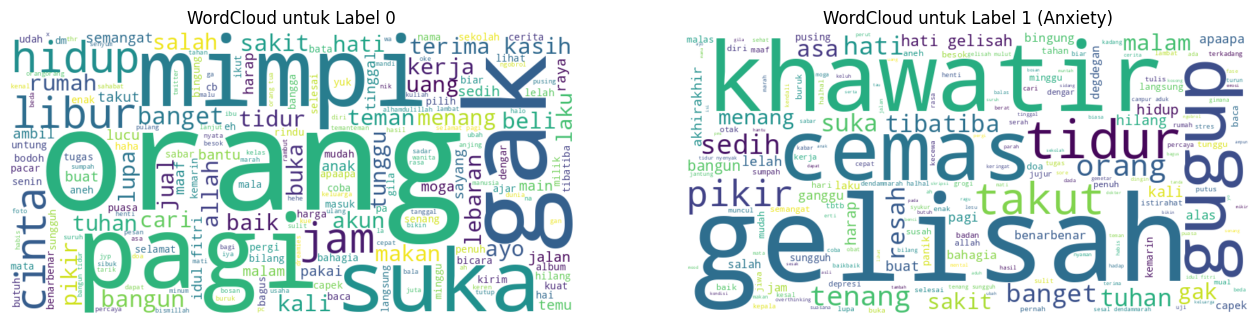

In [ ]:
label_0_data = data[data['label'] == 0]['clean']
label_1_data = data[data['label'] == 1]['clean']

# Gabungkan teks untuk setiap label menjadi satu string besar
text_label_0 = " ".join(label_0_data)
text_label_1 = " ".join(label_1_data)

# Buat WordCloud untuk setiap label
wordcloud_label_0 = WordCloud(width=800, height=400, background_color='white').generate(text_label_0)
wordcloud_label_1 = WordCloud(width=800, height=400, background_color='white').generate(text_label_1)

# Tampilkan WordCloud
plt.figure(figsize=(16, 8))

# WordCloud untuk label 0
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_label_0, interpolation='bilinear')
plt.title('WordCloud untuk Label 0')
plt.axis('off')

# WordCloud untuk label 1
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_label_1, interpolation='bilinear')
plt.title('WordCloud untuk Label 1 (Anxiety)')
plt.axis('off')

plt.show()

In [ ]:
stop_words

{'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'anu',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 '

In [ ]:
#colab
data.to_csv('cleaned_eng.csv', index=False)  # index=False untuk tidak menyimpan indeks
files.download('cleaned_eng.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## SMOTE

In [ ]:
uploaded = files.upload()

Saving cleaned_eng.csv to cleaned_eng (1).csv


In [ ]:
import pandas as pd
data_clean = pd.read_csv('cleaned_eng.csv', delimiter=',')
print("Banyak Data:", len(data_clean))
print(data_clean.info())
print(data_clean.keys())
data_clean.head()

Banyak Data: 6980
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6980 entries, 0 to 6979
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   teks    6912 non-null   object 
 1   label   6980 non-null   float64
 2   clean   6912 non-null   object 
 3   tokens  6980 non-null   object 
dtypes: float64(1), object(3)
memory usage: 218.2+ KB
None
Index(['teks', 'label', 'clean', 'tokens'], dtype='object')


,teks,label,clean,tokens
0,ampun,1.0,ampun,['ampun']
1,susah tidur pikir bingung hati gelisah selaras,1.0,susah tidur pikir bingung hati gelisah selaras,"['susah', 'tidur', 'pikir', 'bingung', 'hati', 'gelisah', 'selaras']"
2,salah mundur sayang maju ragu tinggal gelisah gelisah,1.0,salah mundur sayang maju ragu tinggal gelisah gelisah,"['salah', 'mundur', 'sayang', 'maju', 'ragu', 'tinggal', 'gelisah', 'gelisah']"
3,alih fokus khawatir,1.0,alih fokus khawatir,"['alih', 'fokus', 'khawatir']"
4,resah resah bulan nak maksud,1.0,resah resah bulan nak maksud,"['resah', 'resah', 'bulan', 'nak', 'maksud']"


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Selecting the features and target
X = data_clean['clean'].fillna('')
y = data_clean['label']

# Using TF-IDF for vectorizing the text
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42, stratify=y)

# Initializing SMOTE
smote = SMOTE(random_state=42)

# Applying SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Displaying label distribution before and after SMOTE
print("Distribusi label sebelum SMOTE:\n", y_train.value_counts())

# Displaying label distribution before and after SMOTE
print("Distribusi label sebelum SMOTE:\n", y_test.value_counts())

Distribusi label sebelum SMOTE:
 label
0.0    4998
1.0     586
Name: count, dtype: int64
Distribusi label sebelum SMOTE:
 label
0.0    1249
1.0     147
Name: count, dtype: int64


In [ ]:
dt = pd.DataFrame(X_test)
print(dt.info())
print(dt.keys())
print(dt.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1396 non-null   object
dtypes: object(1)
memory usage: 11.0+ KB
None
RangeIndex(start=0, stop=1, step=1)
                                                                                                                                                                                                          0
0                                                                          (0, 4050)\t0.5983826426036981\n  (0, 8101)\t0.5983826426036981\n  (0, 4043)\t0.4095219730828259\n  (0, 7052)\t0.3408345340830052
1                                                                                                                                             (0, 7808)\t0.7229296414128968\n  (0, 690)\t0.6909216551582532
2                                                                            (0, 8350)\t0.42

In [ ]:
dt = pd.DataFrame(X_train_res)
print(dt.info())
print(dt.keys())
print(dt.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9996 non-null   object
dtypes: object(1)
memory usage: 78.2+ KB
None
RangeIndex(start=0, stop=1, step=1)
                                                                                                                                                                                                                                                                                                                                                                                 0
0         (0, 3143)\t0.37289099131494\n  (0, 8842)\t0.3606343705184844\n  (0, 4930)\t0.3433596337442329\n  (0, 2470)\t0.3511273968363091\n  (0, 8772)\t0.3311030129477772\n  (0, 2861)\t0.2942500193259512\n  (0, 1664)\t0.2808867196039201\n  (0, 4709)\t0.22061241353336875\n  (0, 2397)\t0.24250894023565567\n  (0, 3288)\t0.2431798949388

In [ ]:
# Inverse transform the TF-IDF vectors to get the original text back
# Note: This may not give the exact original text due to the nature of TF-IDF transformation
#       But it will give a close approximation.
texts_res = vectorizer.inverse_transform(X_train_res)

# Join the words back to form the text
original_texts_res = [' '.join(text) for text in texts_res]

# Convert to DataFrame
train_data = pd.DataFrame({
    'clean': original_texts_res,
    'label': y_train_res
})


In [ ]:
# Inverse transform the TF-IDF vectors to get the original text back
# Note: This may not give the exact original text due to the nature of TF-IDF transformation
#       But it will give a close approximation.
texts_res = vectorizer.inverse_transform(X_test)

# Join the words back to form the text
original_texts_res = [' '.join(text) for text in texts_res]

# Convert to DataFrame
test_data = pd.DataFrame({
    'clean': original_texts_res,
    'label': y_test
})


In [ ]:
test_data.to_csv('test_data.csv', index=False)
files.download('test_data.csv')

print("Data has been exported to 'test_data.csv'")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data has been exported to 'test_data.csv'


In [ ]:
train_data.to_csv('train_data.csv', index=False)
files.download('train_data.csv')

print("Data has been exported to 'train_data.csv'")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data has been exported to 'train_data.csv'


## DAAHHHHH

In [ ]:
duplicates = cleaned_eng.duplicated()

# Menghitung jumlah kolom yang duplicate
num_duplicate_columns = duplicates.sum()
print(num_duplicate_columns)

3689


In [ ]:
test_data.to_csv('test_data.csv', index=False)

print("Data has been exported to 'test_data.csv'")

Data has been exported to 'test_data.csv'


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
resampled_data['tokens'] = resampled_data['clean'].apply(word_tokenize)
resampled_data

,clean,label,tokens
0,wibawa puji hadap manusia suka allah,0.0,"[wibawa, puji, hadap, manusia, suka, allah]"
1,apaapaanhadeh waswas ngerjain tibatiba enggak gelisah,1.0,"[apaapaanhadeh, waswas, ngerjain, tibatiba, enggak, gelisah]"
2,kemane sadar nya,0.0,"[kemane, sadar, nya]"
3,nyerah benar capek banget,0.0,"[nyerah, benar, capek, banget]"
4,pov istri orang,0.0,"[pov, istri, orang]"
...,...,...,...
9919,banget cemas enggak hidup kali suka,1.0,"[banget, cemas, enggak, hidup, kali, suka]"
9920,banget cemas kalo sesak dingin sakkit panas,1.0,"[banget, cemas, kalo, sesak, dingin, sakkit, panas]"
9921,banget sayang cemas kayak enggak aneh kalo sakit pagi tahan ku badan dokter obat fisik cont minum,1.0,"[banget, sayang, cemas, kayak, enggak, aneh, kalo, sakit, pagi, tahan, ku, badan, dokter, obat, fisik, cont, minum]"
9922,tidur nyenyak tips relax gelisah enggak biar tonton youtube,1.0,"[tidur, nyenyak, tips, relax, gelisah, enggak, biar, tonton, youtube]"


In [ ]:
from wordcloud import WordCloud  # Import WordCloud class from wordcloud
import matplotlib.pyplot as plt

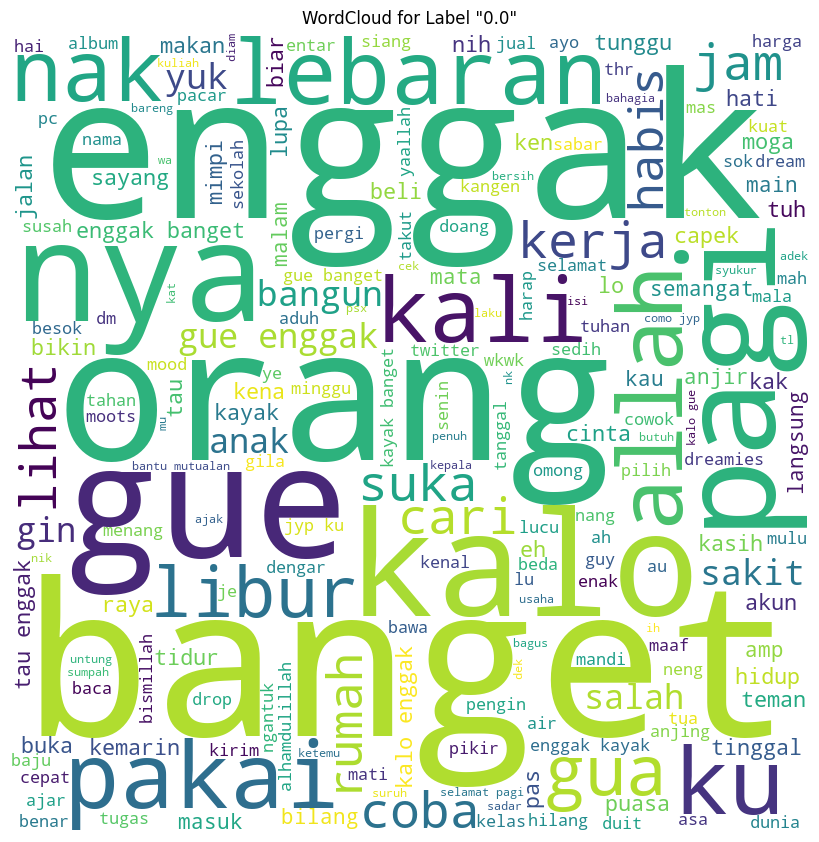

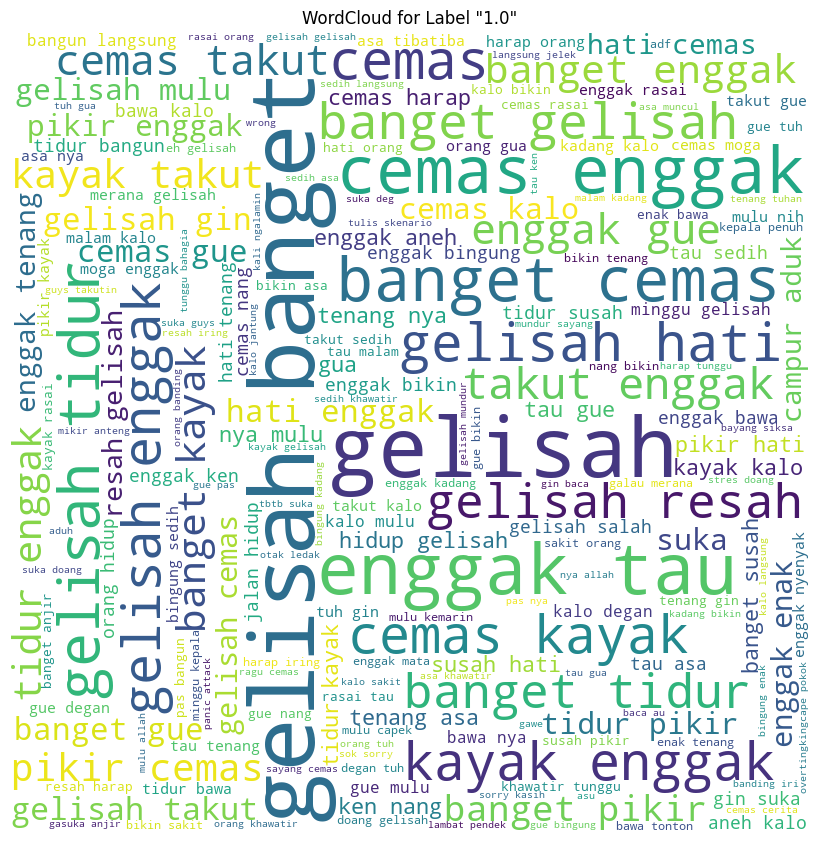

In [ ]:
# Concatenate text by label
text_by_label = {}
for label, text in zip(resampled_data['label'], resampled_data['clean']):
    if label not in text_by_label:
        text_by_label[label] = text
    else:
        text_by_label[label] += ' ' + text

# Create WordCloud for each label
for label, text in text_by_label.items():
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(text)

    # Plot the WordCloud
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(f'WordCloud for Label "{label}"')
    plt.show()

In [ ]:
new_data = text_new[['clean_3', 'label']]

In [ ]:
new_data.head()

,clean,label
0,bangun asa sesak dada presentasi benarbenar khawatir,1
1,pagi cemas alas berat,1
2,coba bangun pagi semangat cemas langsung serang bangun,1
3,pagi bangun pikir kacau sulit kumpul berani,1
4,tidur nyenyak malam cemas lelah,1


In [ ]:
new_data.rename(columns={'clean_3': 'clean'}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_22016\2893172931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.rename(columns={'clean_3': 'clean'}, inplace=True)


In [ ]:
new_data = new_data.drop('clean', axis=1)

In [ ]:
text_new.head()

,text,label,clean,clean_2,clean
0,Aku bangun dengan perasaan sesak di dada lagi. Presentasi hari ini benar-benar membuatku khawatir.,1,bangun asa sesak dada presentasi benarbenar buat khawatir,bangun asa sesak dada presentasi benarbenar buat khawatir,bangun asa sesak dada presentasi benarbenar khawatir
1,Pagi ini aku merasa cemas tanpa alasan yang jelas. Segalanya terasa berat.,1,pagi cemas alas berat,pagi cemas alas berat,pagi cemas alas berat
2,"Aku mencoba bangun pagi dengan semangat, tetapi kecemasan langsung menyerangku begitu aku bangun.",1,coba bangun pagi semangat cemas langsung serang bangun,coba bangun pagi semangat cemas langsung serang bangun,coba bangun pagi semangat cemas langsung serang bangun
3,Pagi ini aku bangun dengan pikiran yang kacau. Sulit untuk mengumpulkan keberanian untuk memulai hari.,1,pagi bangun pikir kacau sulit kumpul berani,pagi bangun pikir kacau sulit kumpul berani,pagi bangun pikir kacau sulit kumpul berani
4,"Aku tidak bisa tidur nyenyak semalam, dan sekarang kecemasan ini membuatku lelah bahkan sebelum hari dimulai.",1,tidur nyenyak malam cemas buat lelah,tidur nyenyak malam cemas buat lelah,tidur nyenyak malam cemas lelah


In [ ]:
df_combined = pd.concat([resampled_data, new_data], ignore_index=True)

In [ ]:
df_combined.head()

,clean,label
0,wibawa puji hadap manusia suka allah,0.0
1,apaapaanhadeh waswas ngerjain tibatiba enggak gelisah,1.0
2,kemane sadar nya,0.0
3,nyerah benar capek banget,0.0
4,pov istri orang,0.0


## MODELLING

In [ ]:
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
resampled_data.head()

,clean,label
0,wibawa puji hadap manusia suka allah,0.0
1,apaapaanhadeh waswas ngerjain tibatiba enggak gelisah,1.0
2,kemane sadar nya,0.0
3,nyerah benar capek banget,0.0
4,pov istri orang,0.0


In [ ]:
nan_rows = resampled_data[resampled_data['label'].isna()]
print(nan_rows)

Empty DataFrame
Columns: [clean, label]
Index: []


In [ ]:
data = df_combined

In [ ]:
vocab_size = 1000
embedding_dim = 16
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_portion = .8

# Mengumpulkan kalimat dan label
sentences = data['clean'].tolist()
labels = data['label'].tolist()

# Memisahkan data menjadi training dan validation set
training_size = int(len(sentences) * training_portion)
training_sentences = sentences[: training_size]
training_labels = labels[: training_size]

validation_sentences = sentences[training_size:]
validation_labels = labels[training_size:]

# Tokenizing the text
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert labels to numerical values
training_labels = np.array(training_labels)
validation_labels = np.array(validation_labels)


In [ ]:
# Membuat model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model
history = model.fit(
    training_padded,
    training_labels,
    epochs=10,
    batch_size=16,
    validation_data=(validation_padded, validation_labels),
    verbose=2
)

Epoch 1/10


C:\Users\hp\anaconda3\envs\Capstone\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


497/497 - 4s - 7ms/step - accuracy: 0.7262 - loss: 0.5366 - val_accuracy: 0.8385 - val_loss: 0.4681
Epoch 2/10
497/497 - 1s - 2ms/step - accuracy: 0.9575 - loss: 0.1856 - val_accuracy: 0.9794 - val_loss: 0.0929
Epoch 3/10
497/497 - 1s - 2ms/step - accuracy: 0.9922 - loss: 0.0567 - val_accuracy: 0.9965 - val_loss: 0.0227
Epoch 4/10
497/497 - 1s - 2ms/step - accuracy: 0.9967 - loss: 0.0274 - val_accuracy: 0.9960 - val_loss: 0.0373
Epoch 5/10
497/497 - 1s - 2ms/step - accuracy: 0.9974 - loss: 0.0176 - val_accuracy: 0.9960 - val_loss: 0.0205
Epoch 6/10
497/497 - 1s - 2ms/step - accuracy: 0.9972 - loss: 0.0150 - val_accuracy: 0.9965 - val_loss: 0.0089
Epoch 7/10
497/497 - 1s - 2ms/step - accuracy: 0.9976 - loss: 0.0142 - val_accuracy: 0.9960 - val_loss: 0.0236
Epoch 8/10
497/497 - 1s - 2ms/step - accuracy: 0.9971 - loss: 0.0134 - val_accuracy: 0.9960 - val_loss: 0.0216
Epoch 9/10
497/497 - 1s - 2ms/step - accuracy: 0.9976 - loss: 0.0121 - val_accuracy: 0.9960 - val_loss: 0.0270
Epoch 10/10


In [ ]:
def predict_sentences(model, sentences, tokenizer, max_length, padding_type, trunc_type):
    sequences = tokenizer.texts_to_sequences(sentences)
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    predictions = model.predict(padded)
    return predictions


In [ ]:
def predict_sentences(model, sentences, tokenizer, max_length, padding_type, trunc_type):
    # Tokenize and pad the sentences
    sequences = tokenizer.texts_to_sequences(sentences)
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    # Perform prediction
    predictions = model.predict(padded)
    return predictions

In [ ]:
# Contoh kalimat untuk diuji
new_sentences = [
"ucapannyo nepati kprgo prcma idak edop numpang ngaruh bayar tiri nyombongi guno ktek klrgo struktur rusak krno ado kuliah minum makan tua idk ayah kau gagal sanggup orang gelisah",
"masham ribut ajak berani balikin dipinjem rewel kembalirasa rumah ujung suruh pulang cepat nyaman dahal jam laptop khawatir malam ken rasai enggak gelisah",
"Aku bangun dengan perasaan sesak di dada lagi. Presentasi hari ini benar-benar membuatku khawatir",
"Setiap abis magrib knp ya pasti hati ini gelisah kyk gak bisa nerima keadaan. Tapi dgn keadaan begini gak bisa berbuat apa2, kalo di lakuin juga cuman bisa memperkeruh suasana 😞",
"kdg yang dibutuhin kalo lagi ada masalah adalah ketawa-ketawa sampe lupa kalo lagi ada masalah, pas inget lagi kayak gelisah aj gitu “yahh anj ternyata msh ada beban sedih” asdfghjklzxccvbnm",
"Hari ini sangat menyenangkan! Pagi dimulai dengan joging di taman, udara segar membuatku bersemangat."]

In [ ]:
# Melakukan prediksi
predictions = predict_sentences(model, new_sentences, tokenizer, max_length, padding_type, trunc_type)

# Menampilkan hasil prediksi
for sentence, prediction in zip(new_sentences, predictions):
    print(f"Kalimat: {sentence}")
    print(f"Prediksi: {prediction[0]}")
    print("Kategori: anxiety" if prediction[0] > 0.5 else "Kategori: normal")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Kalimat: ucapannyo nepati kprgo prcma idak edop numpang ngaruh bayar tiri nyombongi guno ktek klrgo struktur rusak krno ado kuliah minum makan tua idk ayah kau gagal sanggup orang gelisah
Prediksi: 0.7742801904678345
Kategori: anxiety

Kalimat: masham ribut ajak berani balikin dipinjem rewel kembalirasa rumah ujung suruh pulang cepat nyaman dahal jam laptop khawatir malam ken rasai enggak gelisah
Prediksi: 0.9984354972839355
Kategori: anxiety

Kalimat: Aku bangun dengan perasaan sesak di dada lagi. Presentasi hari ini benar-benar membuatku khawatir
Prediksi: 0.01668330281972885
Kategori: normal

Kalimat: Setiap abis magrib knp ya pasti hati ini gelisah kyk gak bisa nerima keadaan. Tapi dgn keadaan begini gak bisa berbuat apa2, kalo di lakuin juga cuman bisa memperkeruh suasana 😞
Prediksi: 0.9946187138557434
Kategori: anxiety

Kalimat: kdg yang dibutuhin kalo lagi ada masalah adalah ketawa-ketawa sampe lupa kalo lagi ada masalah, pas inget lagi kaya

In [ ]:
model.save("model2.h5")

In [ ]:
# Melakukan prediksi
predictions = predict_sentences(model, data['clean'], tokenizer, max_length, padding_type, trunc_type)

# Menampilkan hasil prediksi
for sentence, prediction in zip(data['clean'], predictions):
    print(f"Kalimat: {sentence}")
    print(f"Prediksi: {prediction[0]}")
    print("anxiety" if prediction[0] > 0.5 else "normal")
    print()

311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Kalimat: wibawa puji hadap manusia suka allah
Prediksi: 0.04452376067638397
normal

Kalimat: apaapaanhadeh waswas ngerjain tibatiba enggak gelisah
Prediksi: 0.999972403049469
anxiety

Kalimat: kemane sadar nya
Prediksi: 0.020426813513040543
normal

Kalimat: nyerah benar capek banget
Prediksi: 0.019707955420017242
normal

Kalimat: pov istri orang
Prediksi: 0.016051294282078743
normal

Kalimat: wasalak best
Prediksi: 0.0066455393098294735
normal

Kalimat: cda bbmpin toserdas putar kontak cp via info produk langsung
Prediksi: 0.003040031297132373
normal

Kalimat: fergusso investasi terang mmm surat lurah tuntut rindu biar pandemi mudah
Prediksi: 0.004284528084099293
normal

Kalimat: sembilukamu ella sendu
Prediksi: 0.011289240792393684
normal

Kalimat: gelisahmbohlah resah
Prediksi: 0.49002605676651
normal

Kalimat: bbykwoh goodluck
Prediksi: 0.014088289812207222
normal

Kalimat: lagibingung begadang benci gue cemas banget
Prediksi: 0.9999307990074

In [ ]:
# Melakukan prediksi
predictions = predict_sentences(model, test_data['clean'], tokenizer, max_length, padding_type, trunc_type)

# Membuat list untuk menyimpan data hasil prediksi
output_data = []

# Menampilkan hasil prediksi dan menyimpannya ke dalam list
for sentence, prediction in zip(test_data['clean'], predictions):
    category = "anxiety" if prediction[0] > 0.5 else "normal"
    output_data.append({'Kalimat': sentence, 'Prediksi': prediction[0], 'Kategori': category})

# Membuat DataFrame dari list hasil prediksi
output_df = pd.DataFrame(output_data)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                                                                                                        Kalimat  \
0                                                                                                brown john hbd   
1                                                                                                     manga kak   
2     deyaveradi qilaman malla sochimni bolsam kelinchak ham qarab doim qizchasi yoshli opamovsinimni men menga   
3                                                                         poji imut lucu nama mimpi sial kucing   
4                                                                                        patut bodoh pandai kau   
...                                                                                                         ...   
1380                                                                           muro ayuda dicen que como jyp ku   
1381                                     

compare[15:30]

In [ ]:
output_df.to_csv('output_df.csv', index=False)

print("Data has been exported to 'output_df.csv'")

Data has been exported to 'output_df.csv'


,Sentence,Prediction,Category,clean,label
0,brown john hbd,0.003998,normal,NaN,NaN
1,manga kak,0.003998,normal,NaN,NaN
2,deyaveradi qilaman malla sochimni bolsam kelinchak ham qarab doim qizchasi yoshli opamovsinimni men menga,0.003998,normal,NaN,NaN
3,poji imut lucu nama mimpi sial kucing,0.003998,normal,NaN,NaN
4,patut bodoh pandai kau,0.003998,normal,NaN,NaN


## FINAL DATASET

In [ ]:
import pandas as pd
from IPython.display import HTML

# Assuming 'data' is your DataFrame
data.to_csv('cleaned.csv', index=False)

# Function to create a download link
def create_download_link(filename):
    import base64
    from IPython.display import HTML

    with open(filename, 'rb') as f:
        b64 = base64.b64encode(f.read()).decode()
    href = f'<a href="data:file/csv;base64,{b64}" download="{filename}">Download {filename}</a>'
    return HTML(href)

# Create and display the download link
create_download_link('cleaned.csv')

In [ ]:
texts = [
    "Aku bangun dengan perasaan sesak di dada lagi. Presentasi hari ini benar-benar membuatku khawatir.",
    "Pagi ini aku merasa cemas tanpa alasan yang jelas. Segalanya terasa berat.",
    "Aku mencoba bangun pagi dengan semangat, tetapi kecemasan langsung menyerangku begitu aku bangun.",
    "Pagi ini aku bangun dengan pikiran yang kacau. Sulit untuk mengumpulkan keberanian untuk memulai hari.",
    "Aku tidak bisa tidur nyenyak semalam, dan sekarang kecemasan ini membuatku lelah bahkan sebelum hari dimulai.",
    "Presentasinya sudah selesai, tapi aku merasa semuanya berjalan buruk.",
    "Siang ini aku tidak bisa berhenti memikirkan kesalahan yang mungkin aku buat saat rapat tadi.",
    "Setelah makan siang, kecemasan masih menguasai pikiranku, aku merasa sangat lelah.",
    "Aku mencoba fokus pada pekerjaan siang ini, tapi pikiran negatif terus muncul.",
    "Rasanya seperti semua orang menilai setiap gerakanku. Siang ini terasa sangat panjang.",
    "Malam ini aku mencoba untuk bersantai, tetapi pikiran tentang pekerjaan besok tidak bisa hilang.",
    "Aku berharap bisa tidur nyenyak malam ini, tapi kecemasan membuatku tetap terjaga.",
    "Menjelang tidur, aku masih memikirkan segala sesuatu yang bisa salah besok.",
    "Aku merasa gelisah dan tidak bisa berhenti memikirkan hal-hal yang membuatku khawatir.",
    "Aku mencoba bermeditasi malam ini, tetapi pikiranku terus berpacu dengan kecemasan."
]

In [ ]:
text_new = pd.DataFrame(texts, columns=['text'])

In [ ]:
text_new['label'] = 1

In [ ]:
text.head()

,text,label
0,Aku bangun dengan perasaan sesak di dada lagi. Presentasi hari ini benar-benar membuatku khawatir.,1
1,Pagi ini aku merasa cemas tanpa alasan yang jelas. Segalanya terasa berat.,1
2,"Aku mencoba bangun pagi dengan semangat, tetapi kecemasan langsung menyerangku begitu aku bangun.",1
3,Pagi ini aku bangun dengan pikiran yang kacau. Sulit untuk mengumpulkan keberanian untuk memulai hari.,1
4,"Aku tidak bisa tidur nyenyak semalam, dan sekarang kecemasan ini membuatku lelah bahkan sebelum hari dimulai.",1
